In [1]:
import pandas as pd
import math
from statistics import mode 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("adult.data",header=None,names=['Age','Workplace','fnlwgt','education','education num','marital-stauts','occupation','relationship','race','sex','capital gain','capital loss','hours per week','native country','Salary'])
df

,Age,Workplace,fnlwgt,education,education num,marital-stauts,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
def removeQuestionMark(outCol,inpCol,X,y):
    for i in inpCol:
        repl=X[i].value_counts().keys().tolist()[0]
        X[i]=X[i].replace(to_replace=' ?',value=repl)
    rep=y[outCol[0]].value_counts().keys().tolist()[0]
    y[outCol[0]]=y[outCol[0]].replace(to_replace=' ?',value=rep)
    return[X,y]

def Splitting(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return [X_train,y_train,X_test,y_test]

In [7]:
y=df[['Salary']]
X=df[['Age','fnlwgt','education num','capital gain','capital loss','hours per week','Workplace','education','race','sex','marital-stauts','occupation','relationship','native country']]
inpCol=list(X.columns)
outCol=list(y.columns)
(X,y)=removeQuestionMark(outCol,inpCol,X,y)
categCol=['Workplace','education','race','sex','marital-stauts','occupation','relationship','native country']
contCol=['Age','fnlwgt','education num','capital gain','capital loss','hours per week']
scaler = StandardScaler()
df[contCol]=pd.DataFrame(data=scaler.fit_transform(df[contCol]),columns=contCol)
[x_train,y_train,x_test,y_test]=Splitting(X,y)

C:\Users\Trivikram\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Trivikram\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
enc = OneHotEncoder(handle_unknown='ignore')
binaryValues=enc.fit_transform(x_train[categCol]).toarray()
newCol=list(enc.get_feature_names(categCol))
categTrain = pd.DataFrame(binaryValues,columns=newCol,index=x_train.index)
contTrain=x_train[['Age','fnlwgt','education num','capital gain','capital loss','hours per week']]
x_train=contTrain.merge(categTrain,left_index=True,right_index=True)
x_train

,Age,fnlwgt,education num,capital gain,capital loss,hours per week,Workplace_ Federal-gov,Workplace_ Local-gov,Workplace_ Never-worked,Workplace_ Private,...,native country_ Portugal,native country_ Puerto-Rico,native country_ Scotland,native country_ South,native country_ Taiwan,native country_ Thailand,native country_ Trinadad&Tobago,native country_ United-States,native country_ Vietnam,native country_ Yugoslavia
19749,-0.335892,-1.263102,-0.420060,-0.145920,5.190905,-2.303143,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1216,0.690484,0.510218,-0.031360,0.895083,-0.216660,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27962,-1.142331,-1.263652,-0.031360,-0.145920,-0.216660,-0.845327,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23077,1.276984,0.621778,-0.420060,-0.145920,-0.216660,-0.035429,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10180,-1.582206,1.018184,-1.197459,-0.145920,-0.216660,-2.546112,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,0.617171,1.607629,1.134739,-0.145920,-0.216660,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5390,-0.555830,-0.403259,-0.808759,-0.145920,-0.216660,-1.574235,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
860,-1.508894,0.251123,-1.197459,-0.145920,-0.216660,-1.655225,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15795,0.837109,-1.283936,-0.420060,-0.145920,-0.216660,3.528120,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
binaryValues=enc.transform(x_test[categCol]).toarray()
categTest = pd.DataFrame(binaryValues,columns=newCol,index=x_test.index)
contTest=x_test[['Age','fnlwgt','education num','capital gain','capital loss','hours per week']]
x_test=pd.concat([contTest,categTest],axis=1)
x_test

,Age,fnlwgt,education num,capital gain,capital loss,hours per week,Workplace_ Federal-gov,Workplace_ Local-gov,Workplace_ Never-worked,Workplace_ Private,...,native country_ Portugal,native country_ Puerto-Rico,native country_ Scotland,native country_ South,native country_ Taiwan,native country_ Thailand,native country_ Trinadad&Tobago,native country_ United-States,native country_ Vietnam,native country_ Yugoslavia
14160,-0.849080,-0.280444,-0.031360,-0.145920,-0.21666,-0.197409,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27048,0.470546,-1.318934,-0.420060,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28868,-0.702455,-0.036669,1.134739,-0.145920,-0.21666,1.179417,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5667,-0.629143,0.002479,1.134739,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7827,-0.702455,-0.004096,-0.031360,0.152244,-0.21666,0.774468,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32476,-0.262580,-1.507417,-0.808759,-0.145920,-0.21666,3.528120,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21100,-1.069018,-1.305614,1.134739,-0.145920,-0.21666,-1.655225,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27131,-1.069018,2.392227,-0.420060,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25526,1.276984,-0.108248,-0.031360,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
neight = KNeighborsClassifier()
length=int(math.sqrt(x_test.shape[0]))
parameters={'n_neighbors':([i for i in range(2,length)])}
clf = GridSearchCV(neight, parameters)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [11]:
clf.fit(x_train,y_train)
predictions=clf.predict(x_test)
acc=(metrics.accuracy_score(y_test,predictions)*100)
print("The accuracy is "+str(acc))

C:\Users\Trivikram\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Trivikram\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Trivikram\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Trivikram\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d 

KeyboardInterrupt: 

In [15]:
coordinates=pd.DataFrame(data=clf.cv_results_)
coordinates

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.562032,0.184797,1.310074,0.348860,2,{'n_neighbors': 2},0.780732,0.778728,0.784520,0.781327,0.002402,69
1,0.287350,0.040944,0.846715,0.034666,3,{'n_neighbors': 3},0.751119,0.750954,0.758852,0.753642,0.003685,96
2,0.280350,0.005437,1.423747,0.756802,4,{'n_neighbors': 4},0.781127,0.778992,0.787021,0.782380,0.003396,63
3,0.488028,0.126490,1.360410,0.372106,5,{'n_neighbors': 5},0.769545,0.764907,0.772937,0.769130,0.003291,95
4,0.337019,0.054170,1.038392,0.014818,6,{'n_neighbors': 6},0.787707,0.784520,0.794129,0.788786,0.003996,37
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.279349,0.024514,1.349077,0.105685,93,{'n_neighbors': 93},0.775730,0.775964,0.779255,0.776983,0.001609,89
92,0.259348,0.002625,1.301741,0.012284,94,{'n_neighbors': 94},0.775336,0.775043,0.778728,0.776369,0.001673,92
93,0.286016,0.039902,1.381746,0.084639,95,{'n_neighbors': 95},0.775336,0.775569,0.779123,0.776676,0.001733,91
94,0.257681,0.009569,1.358742,0.077527,96,{'n_neighbors': 96},0.775072,0.775043,0.778597,0.776237,0.001668,94


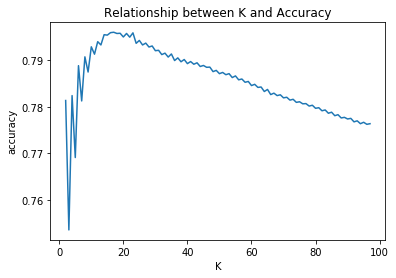

In [16]:
xValues=coordinates['param_n_neighbors']
yValues=coordinates['mean_test_score']
plt.plot(xValues, yValues) 
plt.xlabel('K') 
plt.ylabel('accuracy') 
plt.title('Relationship between K and Accuracy')   
plt.show() 

In [17]:
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [141]:
coordinates.loc[17]['mean_test_score']

0.7957177957177958